Link do notatnika: https://colab.research.google.com/drive/1Y-vnBQnJLRce2cw5gIg6KyP5Q6A12wX5?usp=sharing

---



In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import plotly.express as px

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
iris_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/Iris.csv"
glass_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/glass.data"
wine_path = "/content/drive/MyDrive/Colab Notebooks/1 sem AI/ML/ML_l0/wine.data"

analiza:
instancje: wiersze
min, max, med, śr
ile obserwacji, ile atrybutów, jakie to są atrybuty, ilość klas, czy zbalanosowane liczności w klasach

4. Analiza zbiorów IRIS, WINE, GLASS: klasy (liczba, interpretacja), instancje, atrybuty,
dystrybucja klas w zbiorze.
5. Wyrysowanie wykresu zależności długości/szerokości płatków IRIS a klasą (z
kolorem) (seaborn implot)
6. Użycie PCA i narysowanie wykresu na wyniku działania PCA (użyto: seaborn PairGrid)

- Instalacja środowiska z niezbędnymi bibliotekami
- Wczytanie zbioru IRIS, wyrysowanie wykresu zależności długości/szerokości
płatków (jak Wykres 1), Analiza zbioru i wizualizacja rozkładu danych (jak
Wykres 2)
- Wczytanie zbioru GLASS, wyrysowanie wykresu zależności wybranych atrybutów
(jak Wykres 1), Analiza zbioru i wizualizacja rozkładu danych (jak Wykres 2)
- Wczytanie zbioru WINE, wyrysowanie wykresu zależności wybranych atrybutów
(jak Wykres 1), Analiza zbioru i wizualizacja rozkładu danych (jak Wykres 2)
- Użycie PCA i narysowanie wykresu wynikowego dla trzech zbiorów



#Iris

In [ ]:
import arff
iris = pd.read_csv(iris_path)

In [ ]:
iris.columns

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [ ]:
iris = iris.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
iris.head()  #sprawdzenie początkowych wpisów

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm      Species
0            5.1           3.5            1.4           0.2  Iris-setosa
1            4.9           3.0            1.4           0.2  Iris-setosa
2            4.7           3.2            1.3           0.2  Iris-setosa
3            4.6           3.1            1.5           0.2  Iris-setosa
4            5.0           3.6            1.4           0.2  Iris-setosa

In [ ]:
pd.value_counts(iris['Species'])  #Sprawdzenie rozkładu klas

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

In [ ]:
iris.describe()  #Sprawdzenie podstawowych miar dla wszystkich atrybutów

SepalLengthCm  SepalWidthCm  PetalLengthCm  PetalWidthCm
count     150.000000    150.000000     150.000000    150.000000
mean        5.843333      3.054000       3.758667      1.198667
std         0.828066      0.433594       1.764420      0.763161
min         4.300000      2.000000       1.000000      0.100000
25%         5.100000      2.800000       1.600000      0.300000
50%         5.800000      3.000000       4.350000      1.300000
75%         6.400000      3.300000       5.100000      1.800000
max         7.900000      4.400000       6.900000      2.500000

In [ ]:
fig = px.scatter(iris, x = "SepalLengthCm", y = "SepalWidthCm", color = "Species",
                 width=700, height=400, title="Zależność długość i szerokości kielicha")
fig.show()

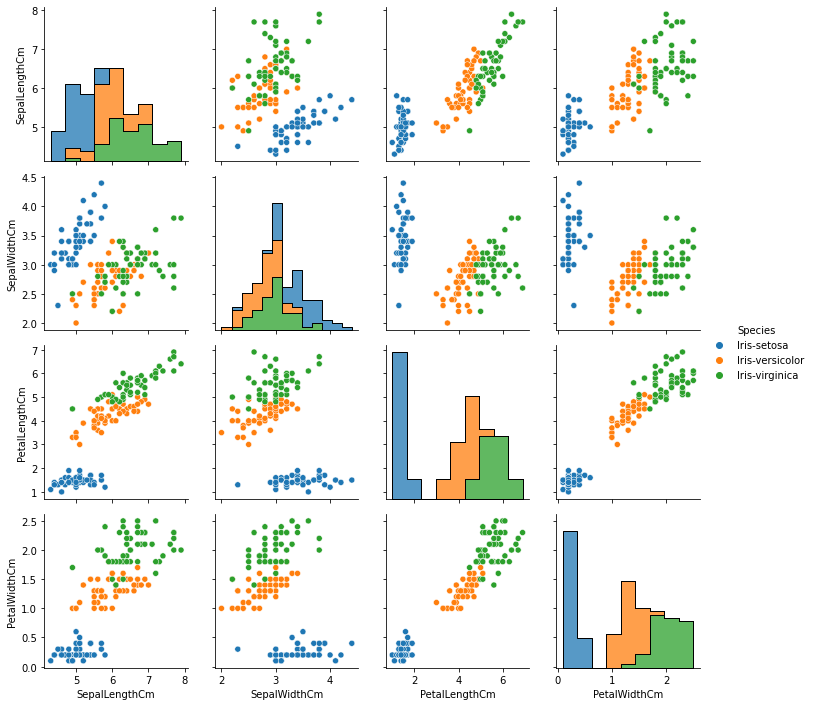

In [ ]:
g = sns.PairGrid(iris, hue="Species")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

PCA (zmniejszenie z 4 wymiarów do 2)

In [ ]:
# Rozdzielanie dataframu
features_iris = ['SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm']  #atrybuty

x_iris = iris.loc[:, features_iris].values  #wydzielenie samych atrybutów

x_iris = StandardScaler().fit_transform(x_iris)  #średnia = 0, wariancja = 1

In [ ]:
# Przeprowadzenie PCA

pca = PCA(n_components=2)
pc_iris = pca.fit_transform(x_iris)

pc_df_iris = pd.DataFrame(data = pc_iris,
                            columns = ['pc 1', 'pc 2'])

In [ ]:
#Złączenie PCA z klasami
final_iris = pd.concat([iris["Species"], pc_df_iris], axis=1)

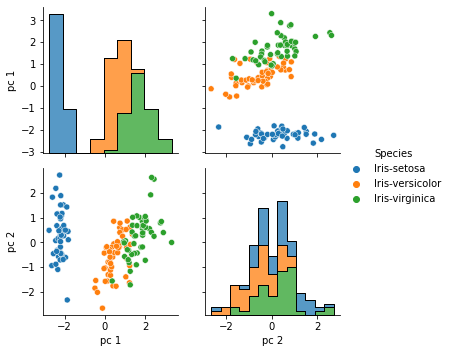

In [ ]:
g = sns.PairGrid(final_iris, hue="Species")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

Wnioski:
- Zbiór zawiera 50/50/50 próbek zbiorów trzech gatunków irysów, więc klasy są idealnie zbalansowane.
- Każda dana ma 4 atrybuty: Długość i szerokość kielicha oraz długość i szerokość działki kielicha.
- W jednej z tabel również zawarłem podstawową analizę zbioru dla każdej kolumny.
- Po analizie wykresów zależności wszystkich parametrów oraz zależności dwóch składowych głównych pozyskanych z algorytmu PCA można zauważyć, że klasa Iris-setosa bardziej różni się od innych co pozwoli nam na łatwiejsze klasyfikowanie w przyszłości, natomiast Iris-versicolor oraz virginica są już zbliżone do siebie i analizowane próbki mają pewny przekrój co może stanowić ewentualną trudność.

#Wine

In [ ]:
wine = pd.read_csv(wine_path, header=None)

In [ ]:
wine.head()

0      1     2     3     4    5     6     7     8     9     10    11    12  \
0   1  14.23  1.71  2.43  15.6  127  2.80  3.06  0.28  2.29  5.64  1.04  3.92   
1   1  13.20  1.78  2.14  11.2  100  2.65  2.76  0.26  1.28  4.38  1.05  3.40   
2   1  13.16  2.36  2.67  18.6  101  2.80  3.24  0.30  2.81  5.68  1.03  3.17   
3   1  14.37  1.95  2.50  16.8  113  3.85  3.49  0.24  2.18  7.80  0.86  3.45   
4   1  13.24  2.59  2.87  21.0  118  2.80  2.69  0.39  1.82  4.32  1.04  2.93   

     13  
0  1065  
1  1050  
2  1185  
3  1480  
4   735

In [ ]:
wine.columns = ['Quality', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity' ,
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']

In [ ]:
wine.head()

Quality  Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  \
0        1    14.23        1.71  2.43               15.6        127   
1        1    13.20        1.78  2.14               11.2        100   
2        1    13.16        2.36  2.67               18.6        101   
3        1    14.37        1.95  2.50               16.8        113   
4        1    13.24        2.59  2.87               21.0        118   

   Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
0           2.80        3.06                  0.28             2.29   
1           2.65        2.76                  0.26             1.28   
2           2.80        3.24                  0.30             2.81   
3           3.85        3.49                  0.24             2.18   
4           2.80        2.69                  0.39             1.82   

   Color intensity   Hue  OD280/OD315 of diluted wines  Proline  
0             5.64  1.04                          3.92     1065  
1             4.38  1.05                          3.40     1050  
2             5.68  1.03                          3.17     1185  
3             7.80  0.86                          3.45     1480  
4             4.32  1.04                          2.93      735

In [ ]:
wine.shape

(178, 14)

In [ ]:
wine.columns

Index(['Quality', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
       'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols',
       'Proanthocyanins', 'Color intensity', 'Hue',
       'OD280/OD315 of diluted wines', 'Proline'],
      dtype='object')

In [ ]:
pd.value_counts(wine['Quality'])  #Sprawdzenie rozkładu klas

2    71
1    59
3    48
Name: Quality, dtype: int64

In [ ]:
wine.describe()

Quality     Alcohol  Malic acid         Ash  Alcalinity of ash  \
count  178.000000  178.000000  178.000000  178.000000         178.000000   
mean     1.938202   13.000618    2.336348    2.366517          19.494944   
std      0.775035    0.811827    1.117146    0.274344           3.339564   
min      1.000000   11.030000    0.740000    1.360000          10.600000   
25%      1.000000   12.362500    1.602500    2.210000          17.200000   
50%      2.000000   13.050000    1.865000    2.360000          19.500000   
75%      3.000000   13.677500    3.082500    2.557500          21.500000   
max      3.000000   14.830000    5.800000    3.230000          30.000000   

        Magnesium  Total phenols  Flavanoids  Nonflavanoid phenols  \
count  178.000000     178.000000  178.000000            178.000000   
mean    99.741573       2.295112    2.029270              0.361854   
std     14.282484       0.625851    0.998859              0.124453   
min     70.000000       0.980000    0.340000              0.130000   
25%     88.000000       1.742500    1.205000              0.270000   
50%     98.000000       2.355000    2.135000              0.340000   
75%    107.000000       2.800000    2.875000              0.437500   
max    162.000000       3.880000    5.080000              0.660000   

       Proanthocyanins  Color intensity         Hue  \
count       178.000000       178.000000  178.000000   
mean          1.590899         5.058090    0.957449   
std           0.572359         2.318286    0.228572   
min           0.410000         1.280000    0.480000   
25%           1.250000         3.220000    0.782500   
50%           1.555000         4.690000    0.965000   
75%           1.950000         6.200000    1.120000   
max           3.580000        13.000000    1.710000   

       OD280/OD315 of diluted wines      Proline  
count                    178.000000   178.000000  
mean                       2.611685   746.893258  
std                        0.709990   314.907474  
min                        1.270000   278.000000  
25%                        1.937500   500.500000  
50%                        2.780000   673.500000  
75%                        3.170000   985.000000  
max                        4.000000  1680.000000

In [ ]:
fig = px.scatter(wine, x = "Hue", y = "Alcohol", color = "Quality",
                 width=700, height=400, title="Zależność mocy trunku od jego odcienia")
fig.show()

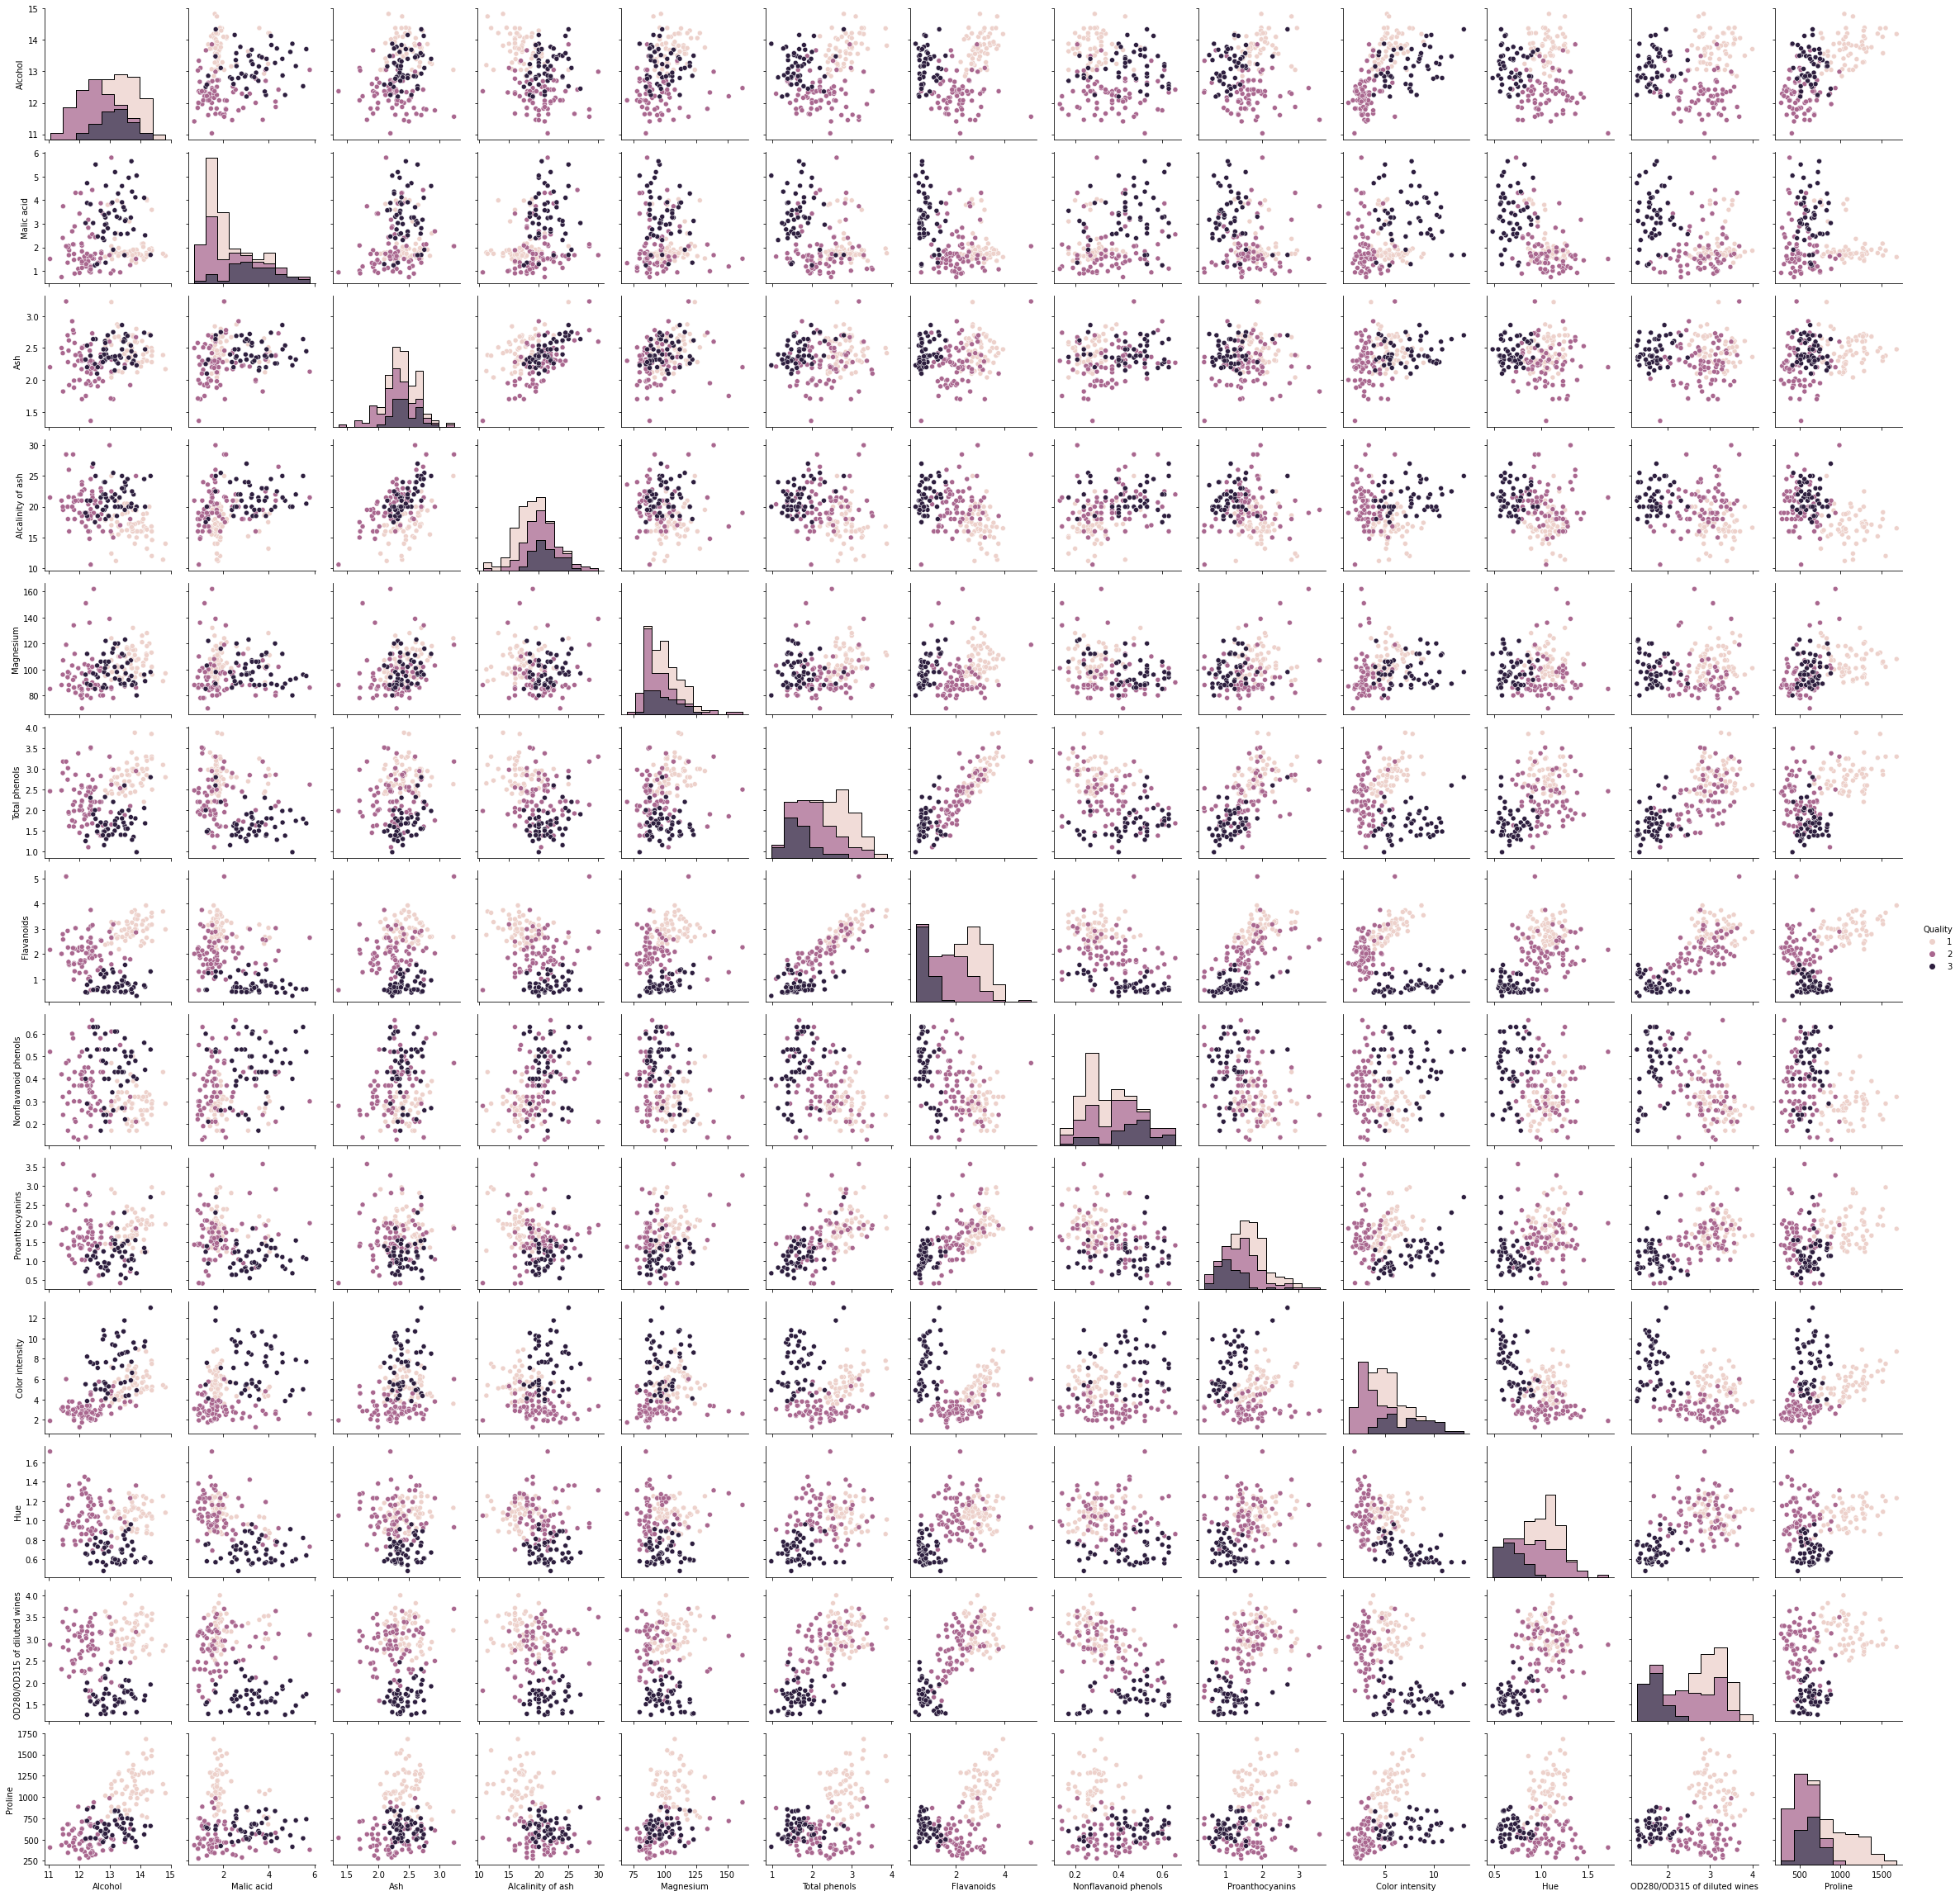

In [ ]:
g = sns.PairGrid(wine, hue="Quality")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

PCA dla win

In [ ]:
features_wine = ['Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash',
                'Magnesium', 'Total phenols', 'Flavanoids',
                'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity' ,
                'Hue', 'OD280/OD315 of diluted wines', 'Proline']  #atrybuty

x_wine = wine.loc[:, features_wine].values  #wydzielenie samych atrybutów

x_wine = StandardScaler().fit_transform(x_wine)  #średnia = 0, wariancja = 1

In [ ]:
pca = PCA(n_components=2)
pc_wine = pca.fit_transform(x_wine)

pc_df_wine = pd.DataFrame(data = pc_wine,
                            columns = ['pc 1', 'pc 2'])#, 'pc 3', 'pc 4'])

In [ ]:
#Złączenie PCA z resztą df
final_wine = pd.concat([wine["Quality"], pc_df_wine], axis=1)

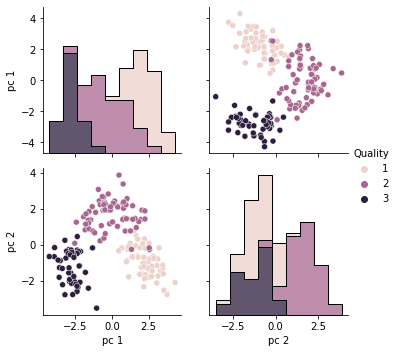

In [ ]:
g = sns.PairGrid(final_wine, hue="Quality")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

Wnioski:
- Zbiór zawiera 71/59/48 próbek zbiorów trzech klas przedstawiających jakość win, widoczne jest więc niezbalansowanie próbek.
- Każda dana ma 13 atrybutów odnoszących się do charakterystyki alkoholu.
- W jednej z tabel również zawarłem podstawową analizę zbioru dla każdej kolumny.
- Po analizie wykresów zależności wszystkich parametrów oraz zależności dwóch składowych głównych pozyskanych z algorytmu PCA można zauważyć, że klasa jakości win w różnyh sposób raz na siebie nachodzą wszystkie na raz, raz niektóre a raz wcale. W algorytmie PCA dla  wyznaczyłem 2 składowe główne. Widać teraz trend, który pokazuje przechodzenie płynne z najgorszej klasy win do najlepszej, co było by intuicyjnym wnioskiem przed jeszcze analizą.

#Glass

In [ ]:
glass = pd.read_csv(glass_path, header=None)

In [ ]:
glass.shape

(214, 11)

In [ ]:
glass.columns = ['Id' ,'RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type']

In [ ]:
glass = glass.drop('Id', axis=1)  #usunięcie niepotrzebnego Id

In [ ]:
glass.head()

RI     Na    Mg    Al     Si     K    Ca   Ba   Fe  Glass_type
0  1.52101  13.64  4.49  1.10  71.78  0.06  8.75  0.0  0.0           1
1  1.51761  13.89  3.60  1.36  72.73  0.48  7.83  0.0  0.0           1
2  1.51618  13.53  3.55  1.54  72.99  0.39  7.78  0.0  0.0           1
3  1.51766  13.21  3.69  1.29  72.61  0.57  8.22  0.0  0.0           1
4  1.51742  13.27  3.62  1.24  73.08  0.55  8.07  0.0  0.0           1

In [ ]:
glass.columns

Index(['RI', 'Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe', 'Glass_type'], dtype='object')

In [ ]:
glass.shape

(214, 10)

In [ ]:
pd.value_counts(glass['Glass_type'])  #Sprawdzenie rozkładu klas

2    76
1    70
7    29
3    17
5    13
6     9
Name: Glass_type, dtype: int64

In [ ]:
glass.describe()

RI          Na          Mg          Al          Si           K  \
count  214.000000  214.000000  214.000000  214.000000  214.000000  214.000000   
mean     1.518365   13.407850    2.684533    1.444907   72.650935    0.497056   
std      0.003037    0.816604    1.442408    0.499270    0.774546    0.652192   
min      1.511150   10.730000    0.000000    0.290000   69.810000    0.000000   
25%      1.516522   12.907500    2.115000    1.190000   72.280000    0.122500   
50%      1.517680   13.300000    3.480000    1.360000   72.790000    0.555000   
75%      1.519157   13.825000    3.600000    1.630000   73.087500    0.610000   
max      1.533930   17.380000    4.490000    3.500000   75.410000    6.210000   

               Ca          Ba          Fe  Glass_type  
count  214.000000  214.000000  214.000000  214.000000  
mean     8.956963    0.175047    0.057009    2.780374  
std      1.423153    0.497219    0.097439    2.103739  
min      5.430000    0.000000    0.000000    1.000000  
25%      8.240000    0.000000    0.000000    1.000000  
50%      8.600000    0.000000    0.000000    2.000000  
75%      9.172500    0.000000    0.100000    3.000000  
max     16.190000    3.150000    0.510000    7.000000

In [ ]:
fig = px.scatter(glass, x = "Na", y = "Mg", color = "Glass_type",
                 width=700, height=400,
                 title="Wykres zależności ilości Magnezu od sodu i wpływ na typ szkła")
fig.show()

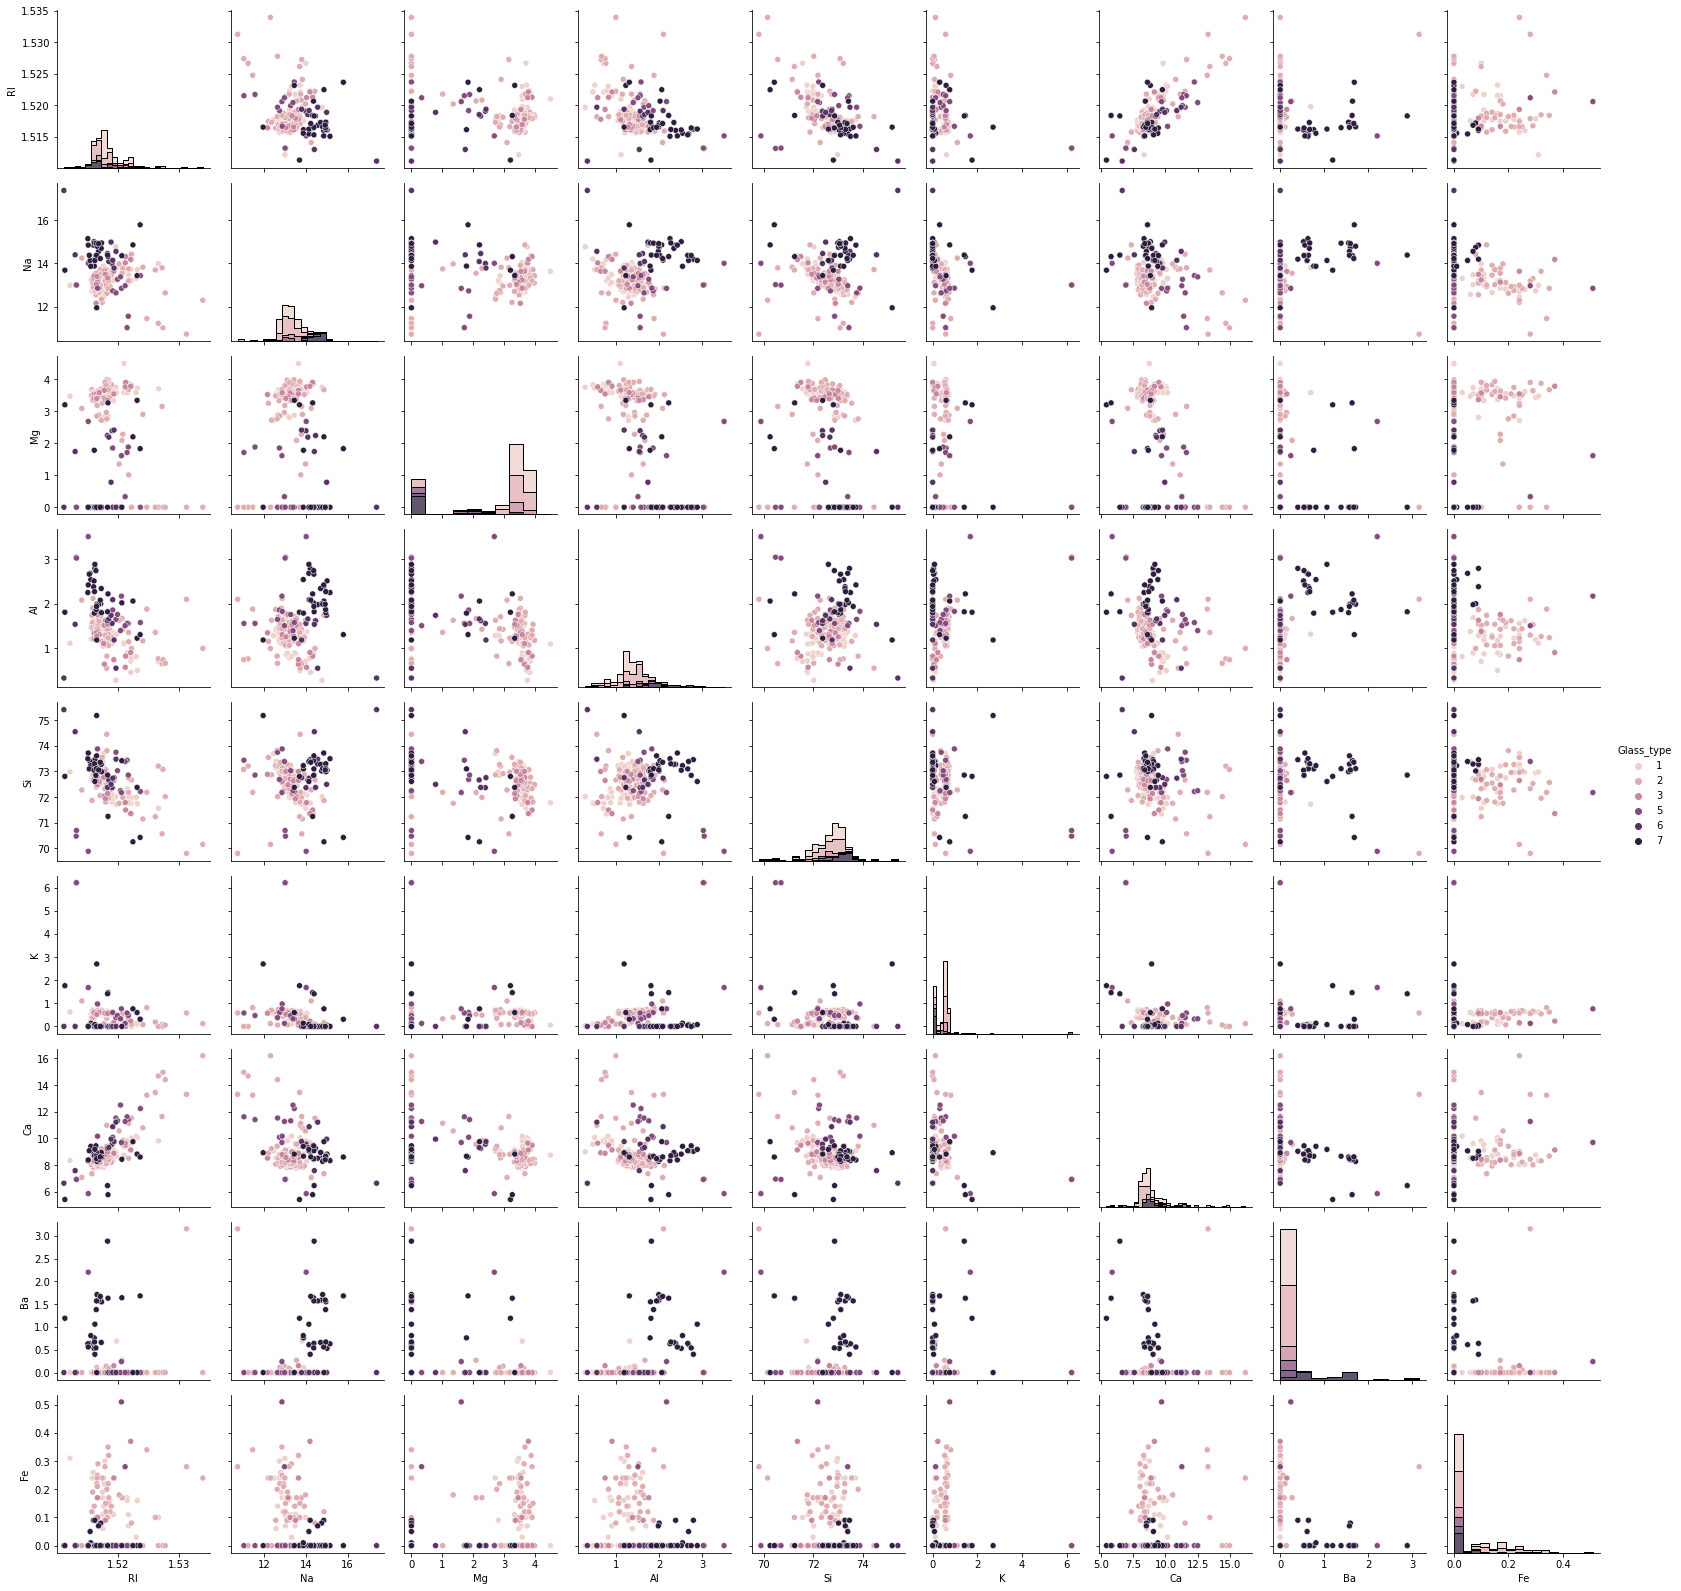

In [ ]:
g = sns.PairGrid(glass, hue="Glass_type")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

PCA dla szkieł

In [ ]:
features_glass = ['RI','Na', 'Mg', 'Al', 'Si', 'K', 'Ca', 'Ba', 'Fe']  #atrybuty

x_glass = glass.loc[:, features_glass].values  #wydzielenie samych atrybutów

x_glass = StandardScaler().fit_transform(x_glass)  #średnia = 0, wariancja = 1

In [ ]:
pca = PCA(n_components=3)
pc_glass = pca.fit_transform(x_glass)

pc_df_glass = pd.DataFrame(data = pc_glass, columns = ['pc 1', 'pc 2', 'pc 3'])

In [ ]:
#Złączenie PCA z resztą df
final_glass = pd.concat([glass["Glass_type"], pc_df_glass], axis=1)

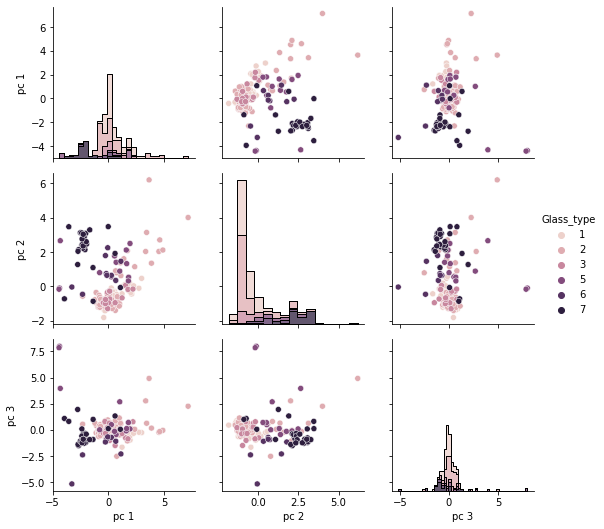

In [ ]:
g = sns.PairGrid(final_glass, hue="Glass_type")
g.map_diag(sns.histplot, multiple="stack", element="step")
g.map_offdiag(sns.scatterplot)
g.add_legend()

Wnioski:
- Zbiór zawiera 76/70/29/17/13/9 próbek zbiorów sześciu klasach, (bez jednej, którą ten dataset nie zawiera)
przedstawiających rodzaj szkła, widoczne jest więc duże niezbalansowanie próbek.
- Każda dana ma 9 atrybutów odnoszących się do składu pierwiastków budujących szkło.
- W jednej z tabel również zawarłem podstawową analizę zbioru dla każdej kolumny zbioru.
- Tym razem w PCA wyznaczyłem 3 a nie jak wcześniej 2 składowe główne, może to nam czasem pomów w zachowaniu nieco większej ilości informacji i nadal zmniejszeniu wymiarowości, jednak analiza wtedy jest trochę trudniejsza.
- zbiór ten nieco różni się od dwóch pozostałych, ponieważ próbki w zbiorach są dosyć rozrzucone po wykresach, czasami wydaje się dosyć losowo, jakby niektóre rodzaje szkła były zupełnie inne od reszty z danej klasy.

#Podsumowanie

1. Czym się różnią zbiory danych analizowane w treści zadania? Na czym może polegać
„trudność” analizy. Który z nich wydaje się być łatwiejszy/trudniejszy?
2. Czy nierównomierny rozkład klas w zbiorze może stanowić problem dla analizy i
dalszej budowy modelu danych?
3. Jak działa PCA i kiedy warto go stosować?

Zbiory różnią się licznościami oraz oraz ilościami klas, co dla pierwszych dwóch oznacza o połowę mniej próbek niż dla zbiory Glass. Datasety Iris oraz Glass różnią się też nieco samym charakterem zbioru od Wine, ponieważ mają one na celu różnice między osobnymi rodzajami a nie płynnym przechodzeniem w jakości. Dużym problemem jest również niezabalansowanie klas, szególnie przy późniejszym tworzeniu modeli, może to skutkować błędnym uczeniem się klasyfikatora który chętniej będzie wybierał liczniejsze klasy, jednak na szczęście są metody aby temu próbować przeciwdziałać. Najłatwiejszy w analizie wydaje mi się zbiór irysów, który posiada tylko 4 atrybuty czyniąc go mniej skomplikowanym. Najtrudniejszy według mnie może być zbiór Glass, który posiada sporo instancji oraz zbalansowanie pomiędzy klasami jest na słabym poziomie.
PCA jest algorytmem redukującym wymiarowość zbioru w celu łatwiejszej jego analizy oraz późniejszej budowy modelu oraz klasyfikacji. Należy jednyk pamiętać że wyznaczając on "principal components" zabiera nam bezpowrotnie część danych które występowały w anszym zbiorze.

#Pobieranie HTMLa

In [ ]:
pip install nbconvert


In [ ]:
%shell jupyter nbconvert --to html /content/ML_0.ipynb

[NbConvertApp] Converting notebook /content/ML_0.ipynb to html
[NbConvertApp] Writing 4911419 bytes to /content/ML_0.html
